# Heritability estimate on predicted task pattern from resting state

In [1]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
%matplotlib inline
%load_ext rpy2.ipython
sns.set_style("whitegrid")

In [3]:
#custom function for key sorting element
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [27]:
# Set up the paths 
#path_root = '/media/yassine/data_disk/Drive/HCP2/'
#path_root = "/home/yassinebha/Drive/HCP/"
path_root = '/home/yassinebha/data/data_disk/Drive/HCP2/'
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/pheno_yu_predic")
out_path = os.path.join(path_root,"Solar_heritability/HCP_yu/")

In [29]:
# Set up files name
solar_script = 'fcd_solar_h2r_test.sh'
solar_out = 'predict_Rest1_LR_{}'.format(time.strftime("%d-%m-%Y"))
pheno_save = 'solar_Rest1_LR_pheno.csv'
h2r_out_file = 'h2r_solar_Rest1_LR.csv'
pedig_save = 'solar_Rest1_LR_pedigre.csv'
## Solar covariates
solar_cov = '    cov BMI Gender'

In [30]:
# List of network names
list_trial = pd.read_csv(os.path.join(pheno_path,'rsfmri_REST1_LR_1200R_firstorder__March2019.csv'),sep='\t').columns.drop('subj')
list_trial = list_trial.tolist()
list_trial

['fear_emo',
 'non_emo',
 'math_lang',
 'story_lang',
 'foot_mot',
 'hand_mot',
 'tongue_mot',
 'match_reson',
 'relat_reson',
 'mental_soc',
 'random_soc',
 'body0b_wm',
 'body2b_wm',
 'face0b_wm',
 'face2b_wm',
 'place0b_wm',
 'place2b_wm',
 'tool0b_wm',
 'tool2b_wm']

In [31]:
dataframe = pd.read_csv(os.path.join(pheno_path,'rsfmri_REST1_LR_1200R_firstorder__March2019.csv'),sep='\t')
dataframe.head()

,fear_emo,non_emo,math_lang,story_lang,foot_mot,hand_mot,tongue_mot,match_reson,relat_reson,mental_soc,random_soc,body0b_wm,body2b_wm,face0b_wm,face2b_wm,place0b_wm,place2b_wm,tool0b_wm,tool2b_wm,subj
0,0.072917,0.083333,0.437500,0.854167,0.812500,0.354167,1.000000,0.239583,0.104167,0.364583,0.760417,0.041667,0.156250,0.239583,0.145833,0.145833,0.041667,0.072917,0.145833,100206
1,0.106796,0.087379,0.281553,0.533981,0.932039,0.417476,1.000000,0.378641,0.067961,0.407767,0.883495,0.067961,0.029126,0.097087,0.077670,0.106796,0.048544,0.029126,0.106796,100307
2,0.024590,0.065574,0.401639,0.647541,1.000000,0.475410,0.803279,0.204918,0.073770,0.196721,0.622951,0.049180,0.040984,0.040984,0.032787,0.008197,0.008197,0.040984,0.040984,100408
3,0.016260,0.040650,0.357724,0.487805,1.000000,0.308943,0.756098,0.406504,0.056911,0.227642,0.756098,0.048780,0.024390,0.032520,0.056911,0.089431,0.032520,0.032520,0.008130,100610
4,0.078431,0.107843,0.470588,0.656863,0.931373,0.568627,0.745098,0.264706,0.049020,0.333333,1.000000,0.019608,0.058824,0.127451,0.127451,0.058824,0.029412,0.009804,0.078431,101006


In [32]:
# Merged weight and pheno variables
merged_weight_pheno = pd.read_csv(os.path.join(pheno_path,"predic_pedig.csv"))
merged_weight_pheno.loc[:,'Subject'] = 'HCP' + merged_weight_pheno['Subject'].astype(str)
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,Age_in_Yrs,Gender,ZygositySR,Mother_ID,BMI,fear_emo,non_emo,math_lang,story_lang,...,mental_soc,random_soc,body0b_wm,body2b_wm,face0b_wm,face2b_wm,place0b_wm,place2b_wm,tool0b_wm,tool2b_wm
0,HCP100206,27,1,NotTwin,56037,26.64,0.072917,0.083333,0.437500,0.854167,...,0.364583,0.760417,0.041667,0.156250,0.239583,0.145833,0.145833,0.041667,0.072917,0.145833
1,HCP100307,27,2,NotMZ,51488,22.96,0.106796,0.087379,0.281553,0.533981,...,0.407767,0.883495,0.067961,0.029126,0.097087,0.077670,0.106796,0.048544,0.029126,0.106796
2,HCP100408,33,1,MZ,51730,27.75,0.024590,0.065574,0.401639,0.647541,...,0.196721,0.622951,0.049180,0.040984,0.040984,0.032787,0.008197,0.008197,0.040984,0.040984
3,HCP100610,27,1,NotMZ,52813,36.91,0.016260,0.040650,0.357724,0.487805,...,0.227642,0.756098,0.048780,0.024390,0.032520,0.056911,0.089431,0.032520,0.032520,0.008130
4,HCP101006,35,2,MZ,51283,30.27,0.078431,0.107843,0.470588,0.656863,...,0.333333,1.000000,0.019608,0.058824,0.127451,0.127451,0.058824,0.029412,0.009804,0.078431


In [33]:
# Save the pheno file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

## Build trait file

In [34]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender','ZygositySR','Mother_ID']]
new_list

['BMI',
 'fear_emo',
 'non_emo',
 'math_lang',
 'story_lang',
 'foot_mot',
 'hand_mot',
 'tongue_mot',
 'match_reson',
 'relat_reson',
 'mental_soc',
 'random_soc',
 'body0b_wm',
 'body2b_wm',
 'face0b_wm',
 'face2b_wm',
 'place0b_wm',
 'place2b_wm',
 'tool0b_wm',
 'tool2b_wm']

In [35]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [36]:
# Select a subset of variable from pheno file
file_pheno_pedig = merged_weight_pheno[["ID","ZygositySR","Mother_ID","Gender"]]
file_pheno_pedig.head()

,ID,ZygositySR,Mother_ID,Gender
0,HCP100206,NotTwin,56037,1
1,HCP100307,NotMZ,51488,2
2,HCP100408,MZ,51730,1
3,HCP100610,NotMZ,52813,1
4,HCP101006,MZ,51283,2


In [37]:
file_pheno_pedig.ZygositySR.unique()

array(['NotTwin', 'NotMZ', 'MZ', ' '], dtype=object)

In [38]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.ZygositySR == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [39]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.ID
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.astype(int)
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


tail


,ID,fa,mo,sex,mztwin,hhID
1074,HCP992673,fa_56143,mo_56143,2,,hh_56143
1075,HCP992774,fa_51345,mo_51345,1,,hh_51345
1076,HCP993675,fa_55800,mo_55800,2,,hh_55800
1077,HCP994273,fa_52364,mo_52364,1,,hh_52364
1078,HCP996782,fa_51541,mo_51541,2,,hh_51541


ID        1079
fa        1079
mo        1079
sex       1079
mztwin    1079
hhID      1079
dtype: int64

In [40]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
#for idx, twin in enumerate(uniques):
#    print("{} occurs {} times".format(twin, twin_counts[idx]))

In [41]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [42]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [43]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(str(row.ID)))
display(df_single_pedig.head())
df_single_pedig.count()

/home/yassinebha/jupyter_py3.0/lib/python3.5/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,ID,fa,mo,sex,mztwin,hhID
29,M_HCP105923,fa_52925,mo_52925,2,pair_52925,hh_52925
48,M_HCP110007,fa_54572,mo_54572,2,pair_54572,hh_54572
68,M_HCP114116,fa_51433,mo_51433,2,pair_51433,hh_51433
73,M_HCP114823,fa_99996,mo_99996,2,pair_99996,hh_99996
110,M_HCP122317,fa_51802,mo_51802,1,pair_51802,hh_51802


ID        38
fa        38
mo        38
sex       38
mztwin    38
hhID      38
dtype: int64

In [44]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037,mo_56037,1,,hh_56037
1,HCP100307,fa_51488,mo_51488,2,,hh_51488
2,HCP100408,fa_51730,mo_51730,1,pair_51730,hh_51730
3,HCP100610,fa_52813,mo_52813,1,,hh_52813
4,HCP101006,fa_51283,mo_51283,2,pair_51283,hh_51283


In [45]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
965,M_HCP822244,fa_51582,mo_51582,2,pair_51582,hh_51582
968,M_HCP825654,fa_55682,mo_55682,2,pair_55682,hh_55682
976,M_HCP835657,fa_52137,mo_52137,2,pair_52137,hh_52137
1026,M_HCP904044,fa_51290,mo_51290,2,pair_51290,hh_51290
1063,M_HCP972566,fa_56077,mo_56077,2,pair_56077,hh_56077


In [46]:
df_pedig_final.count()

ID        1117
fa        1117
mo        1117
sex       1117
mztwin    1117
hhID      1117
dtype: int64

In [47]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

## Run SOLAR heritability estimate 

In [48]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [49]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.3.2 (General), last updated on October 31, 2016
Copyright (c) 1995-2016 Maryland Psychiatric Research Center
Visit our website www.solar-eclipse-genetics.org
For questions email: pkochunov@gmail.com
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_Rest1_LR_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      2009  Self
       154  Identical sib pair
      2234  Parent-offspring
       867  Siblings
       446  Unrelated



In [52]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.3.2 (General), last updated on October 31, 2016
Copyright (c) 1995-2016 Maryland Psychiatric Research Center
Visit our website www.solar-eclipse-genetics.org
For questions email: pkochunov@gmail.com
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00019 : Set-19 : tool2b_wm                                                  
All done.


## Results

In [53]:
#solar_out = 'subtype_5_wm_23-01-2018'
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()

data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df.to_csv(os.path.join(out_path,solar_out,'Rest1_LR_h2r_raw.csv'),index=False)
out_herit_df

,Trait,H2r,P,CovVarianceExpl
0,BMI_norm,0.469892,1.553080e-13,0.950591
1,body2b_wm_norm,0.043473,2.233342e-01,0.009539
2,face0b_wm_norm,0.046685,1.847844e-01,0.001128
3,face2b_wm_norm,0.098756,4.416610e-02,0.012618
4,fear_emo_norm,0.087070,5.775540e-02,0.002640
5,foot_mot_norm,0.036200,2.549121e-01,0.005766
6,hand_mot_norm,0.090687,5.049610e-02,0.003388
7,match_reson_norm,0.014540,3.899609e-01,0.023100
8,math_lang_norm,0.038191,2.432108e-01,0.009271
9,mental_soc_norm,0.055536,1.584522e-01,0.015843


In [56]:
# remove unwanted Variables
out_herit_df_clean = out_herit_df[~out_herit_df['Trait'].str.strip().isin(['BMI_norm'])]

In [57]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df_clean['P'], alpha=0.05, method='fdr_bh')
out_herit_df_clean.insert(3,'FDR',pcorr_vec[1])
out_herit_df_clean.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [58]:
out_herit_df_clean

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
1,body2b_wm_norm,0.043473,0.223334,0.309536,0.509289,0.009539
2,face0b_wm_norm,0.046685,0.184784,0.285576,0.544278,0.001128
3,face2b_wm_norm,0.098756,0.044166,0.214435,0.668704,0.012618
4,fear_emo_norm,0.087070,0.057755,0.214435,0.668704,0.002640
5,foot_mot_norm,0.036200,0.254912,0.309536,0.509289,0.005766
6,hand_mot_norm,0.090687,0.050496,0.214435,0.668704,0.003388
7,match_reson_norm,0.014540,0.389961,0.419050,0.377734,0.023100
8,math_lang_norm,0.038191,0.243211,0.309536,0.509289,0.009271
9,mental_soc_norm,0.055536,0.158452,0.269369,0.569653,0.015843
10,non_emo_norm,0.085393,0.056129,0.214435,0.668704,0.002078


In [13]:
out_herit_df_clean.to_csv(os.path.join(out_path,solar_out,'h2r_{}_raw.csv'.format(task_name)),index=False)

In [15]:
# create table for h2r figure
list_sbt = ['sub1','sub2','sub3','sub4','sub5']
df = pd.DataFrame()
list_trial = ['2bk','0bk','contrast_2bk_vs_0bk']
for trait_herit in list_trial:
    mask_df = [x[3:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r','P']][mask_df]
    # extract trial
    column_net = [' '.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r','P']]
    out_herit_clean.reset_index(drop=True,inplace=True)
    dicts = {}
    for ii,sbt in enumerate(list_sbt):
        if sbt not in out_herit_clean.Subt.get_values():
            dicts[ii] = sbt
    if bool(dicts):
        tab_=[{"Trial": out_herit_clean.Trial[0], "Subt": dicts[ii],"H2r":0,"P":1} for ii in dicts.keys()]
        line = pd.DataFrame(tab_,index=dicts.keys())
        df_ = out_herit_clean.append(line).sort_values('Subt').reset_index(drop=True)
        df_ = df_[['Trial','Subt','H2r','P']]
    else:
        df_ = out_herit_clean.sort_values('Subt').reset_index(drop=True)
        df_ = df_[['Trial','Subt','H2r','P']]
    # append to final df
    df = df.append(df_)
# reset index
df.reset_index(drop=True)
# save to csv
df.to_csv(os.path.join(out_path,solar_out,'h2r_{}.csv'.format(task_name)),index=False)
df

,Trial,Subt,H2r,P
0,WM 2bk,sub1,0.267155,2.070000e-05
1,WM 2bk,sub2,0.390991,1.322237e-09
2,WM 2bk,sub3,0.031788,3.116078e-01
3,WM 2bk,sub4,0.220794,3.325000e-04
4,WM 2bk,sub5,0.218927,3.685000e-04
0,WM 0bk,sub1,0.430150,2.745636e-11
1,WM 0bk,sub2,0.000000,1.000000e+00
2,WM 0bk,sub3,0.144456,1.037900e-02
3,WM 0bk,sub4,0.176353,2.402700e-03
4,WM 0bk,sub5,0.433872,6.263906e-12


In [45]:
# Loop over trait and create heritability table for radar plot
#drop_list = ['BMI','FD_mean','FD_scrubbed_mean','Handedness']
#list_new = [x for x in new_list if x not in drop_list ]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


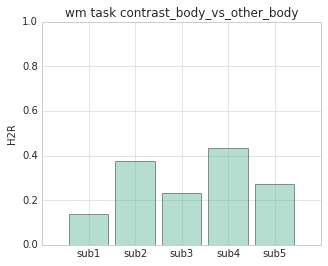

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.139956,0.374592,0.229913,0.431763,0.270369


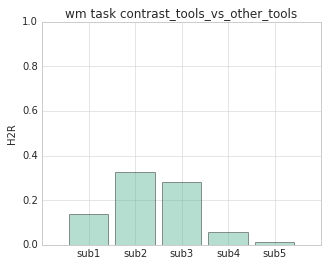

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.138382,0.32748,0.281295,0.055899,0.011812


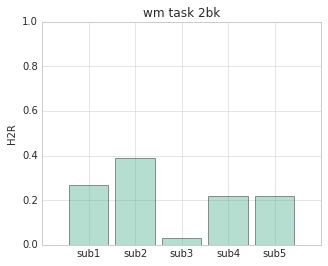

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.267155,0.390991,0.031788,0.220794,0.218927


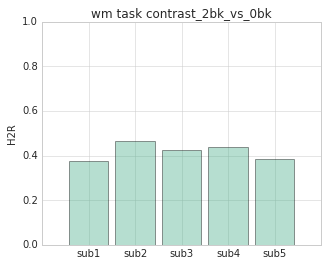

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.373229,0.464555,0.422536,0.439284,0.384133


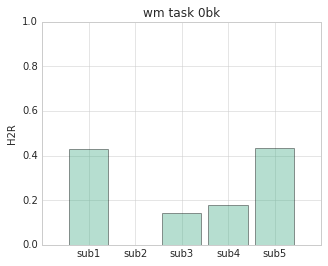

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.43015,0,0.144456,0.176353,0.433872


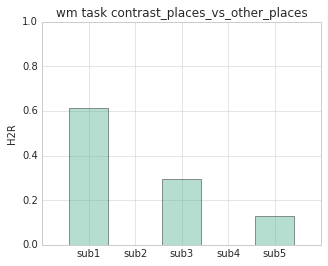

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.611992,0,0.293892,0.0,0.129891


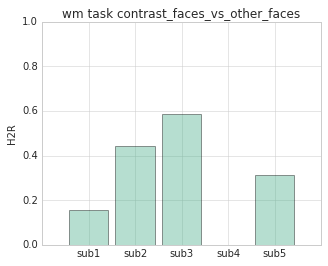

Subt,sub1,sub2,sub3,sub4,sub5
H2R,0.156638,0.441065,0.586789,0,0.312769


In [46]:
## Loop over trait and create heritability table for radar plot
#list_trial = [xx.replace('-','_') for xx in list_trial]
list_sbt = ['sub1','sub2','sub3','sub4','sub5']
for trait_herit in list_trial:
    mask_df = [x[3:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r']][mask_df]
    # extract trial
    column_net = [' '.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r']]
    # Pivot table
    out_herit_final = out_herit_clean.pivot(index='Trial',columns='Subt',values='H2r')
    out_herit_final.index.name=None
    out_herit_final.rename(index={column_net[1]: 'H2R'},inplace= True)
    #put 0 for non for empty heritabity
    for ii in list_sbt:
        if ii not in out_herit_final.columns.get_values():
            out_herit_final.loc[:,ii]=0
    out_herit_final=out_herit_final[list_sbt]
    out_herit_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file.format(task_name,trait_herit)))
    # H2R bar plot
    fig,ax = plt.subplots(figsize=(5, 4))
    y_pos = np.arange(len(out_herit_final.columns))
    ax.bar(y_pos,out_herit_final.ix['H2R'],color="#49ae8a",alpha=0.4,align = 'center',width=0.85)
    ax.set_xticks(y_pos)
    ax.set_xticklabels(list_sbt)
    ax.set_ylim(0,1)
    ax.set_ylabel('H2R')
    #ax.grid(False)
    plt.title('{} task {}'.format(task_name,trait_herit))
    plt.show()
    fig.savefig(os.path.join(subt_path,"{}_barplot_heritability.svg".format(trait_herit)))
    display(out_herit_final)

In [47]:
##### R section #########

In [48]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
# devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
import warnings
warnings.filterwarnings('ignore')

In [49]:
%%R
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

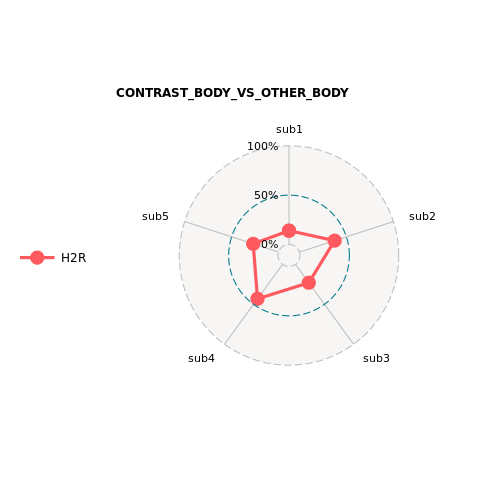

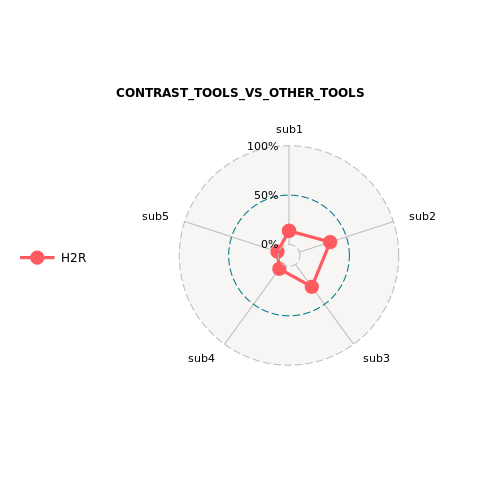

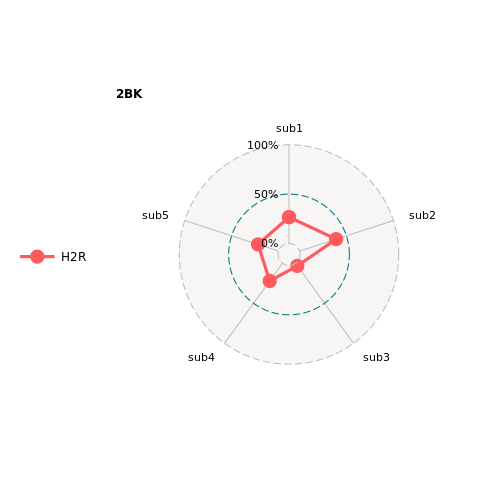

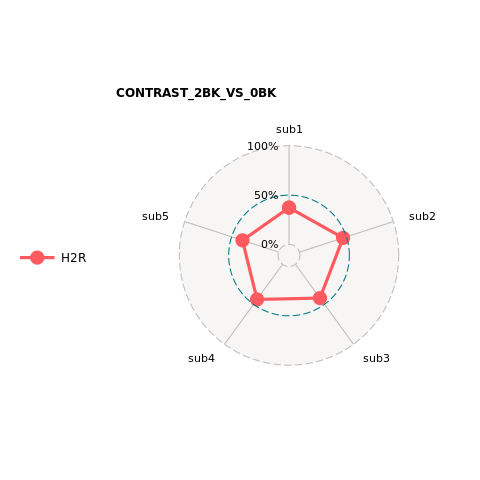

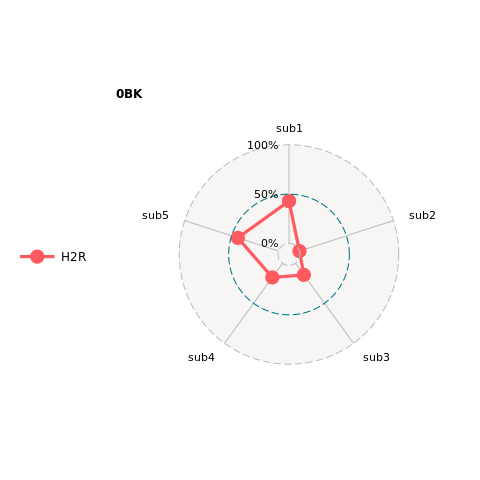

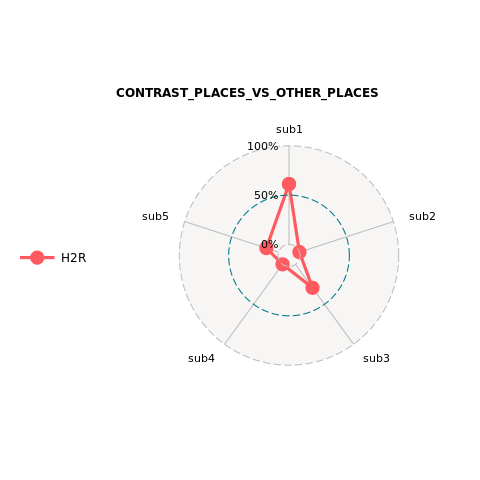

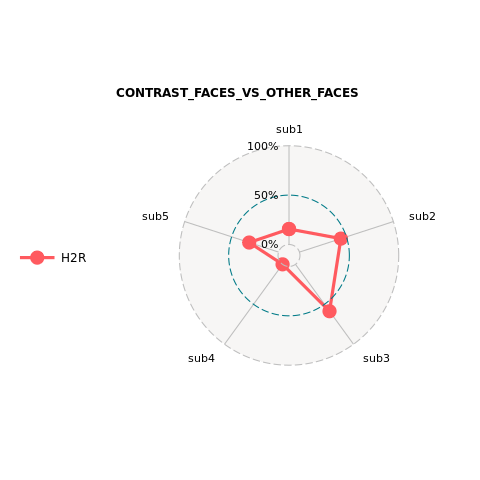

In [50]:
%%R -i out_path,solar_out,task_name,list_trial,path_root
for (ii in list_trial) {
    MyData <- read.csv(file=paste(out_path,solar_out,"/h2r_solar_",task_name,'_spm_',ii,'.csv',sep = ''))
    # plot radar 
    image=ggradar(MyData, grid.min = 0,
                  grid.mid = 0.5, 
                  grid.max = 1, 
                  axis.label.size = 4, 
                  grid.label.size = 5 ,
                  legend.text.size =5) +
    theme(legend.text = element_text(size = 12),plot.title = element_text( face="bold",size = 12)) + 
    ggtitle(paste(' \n  ',toupper(ii),sep = ''))
    ggsave(file=paste(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_WM_18-Oct-2017/" ,ii,"_heritability.svg",sep = ''), plot=image, width=10, height=8)
    print(image)
     }